# A4 Face Detection and Recognition 
Student Name: Fulin Huang 

Student ID: 260740689 

In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import os

## 1 Data Aquisition 

#### Test Image 

(682, 1024, 3)


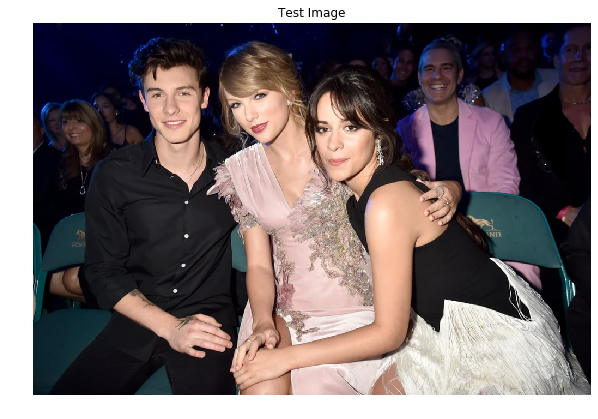

((-0.5, 1023.5, 681.5, -0.5), None)

In [216]:
# Image Reference:https://www.popsugar.com/celebrity/photo-gallery/44850420/image/44865671/Shawn-Mendes-Taylor-Swift-Camila-Cabello
test_image = cv2.imread('test.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
print(test_image.shape)

plt.figure(figsize=(10,10))
plt.imshow(test_image),plt.title("Test Image")
plt.axis('off'), plt.show()

#### Training Images 

#### 1 Describe how you selected the images with respect to the conditions of the detection/recognition methods

I resized the training images to (128, 128) and convert the color to grayscale to make computation more efficient. The reason to make the images the same color and same dimension is for data consistency. It also helps making the computation eaiser in later steps. 

#### Show at least 5 example images for each individual

----- Training Images -----
There are three celebrities in training images:
    Taylor Swift
    Shane Mendes
    Camila Cabello
All training images are collected from Google Images


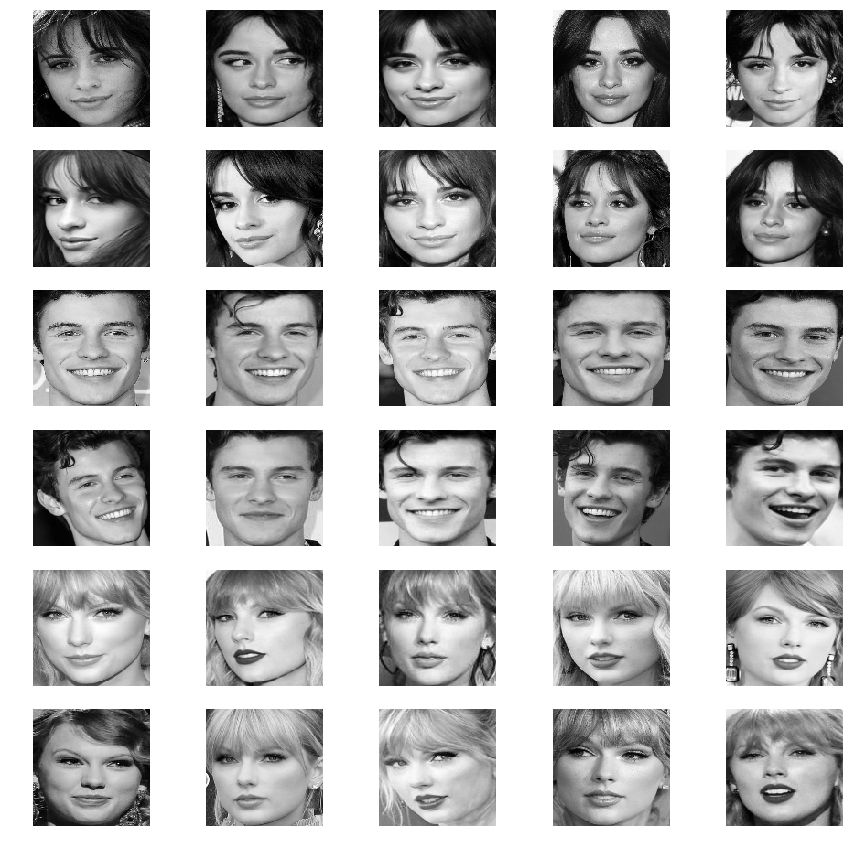

In [107]:
entry = os.listdir('Training_Image')

size = (128, 128)

# Append and Resize Image 
image_list = [] 

for file in sorted(entry): 
    image = cv2.imread('./Training_Image/' + file)
    image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_1 = cv2.resize(image_1, size)
    image_list.append(image_1)
    
plt.figure(figsize=(15,15))

# TODO: Proper refer- encing is required.

print("----- Training Images -----")
print("There are three celebrities in training images:")
print("    Taylor Swift")
print("    Shane Mendes")
print("    Camila Cabello")
print("All training images are collected from Google Images")
for i in range (0, len(image_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(image_list[i], cmap='gray')

## 2 Eigenface Representation

#### 1 Produce and eigenface representation for your training data through PCA

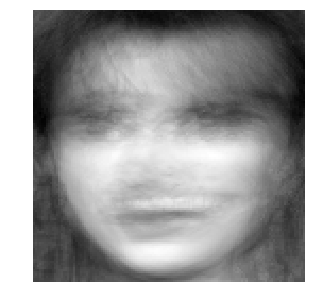

Image Matrix has shape:  (16384, 30)
cov matrix  (30, 30)
eigenpair 14666.330365398419 [  6.16770893   9.27208619  -8.41477503 ...  -6.51867385 -63.74814871
 -76.65178072]
eigenpair 7951.207408960886 [ 79.23403694  73.37221816  72.01426266 ... -69.94134849 -95.87876499
 -93.22221683]
eigenpair 5468.199531242632 [  2.50181415 -10.80389434 -22.66437305 ...  37.98364747 127.48747982
 135.44076322]
eigenpair 4281.321997188062 [ 94.36281919 102.54828803 103.85657927 ...  22.31038719   5.76065412
  33.03969421]
eigenpair 3867.277077548777 [  8.88482528  20.42499847  -1.44405468 ... 102.25162105  70.33892871
  67.06047451]
eigenpair 2709.777342257291 [ 22.51288891  21.13160894  11.30951173 ...   0.73228795 -35.7599356
 -47.29315971]
eigenpair 2280.347219161217 [ -18.27454402  -12.15104192  -16.80739463 ...  -56.73140734 -107.50135158
  -94.68974361]
eigenpair 1835.2951203131377 [-14.75451733 -12.11702967 -30.54607895 ... -69.23197579 -59.43777786
 -50.50946009]
eigenpair 1818.9857069291218 [1

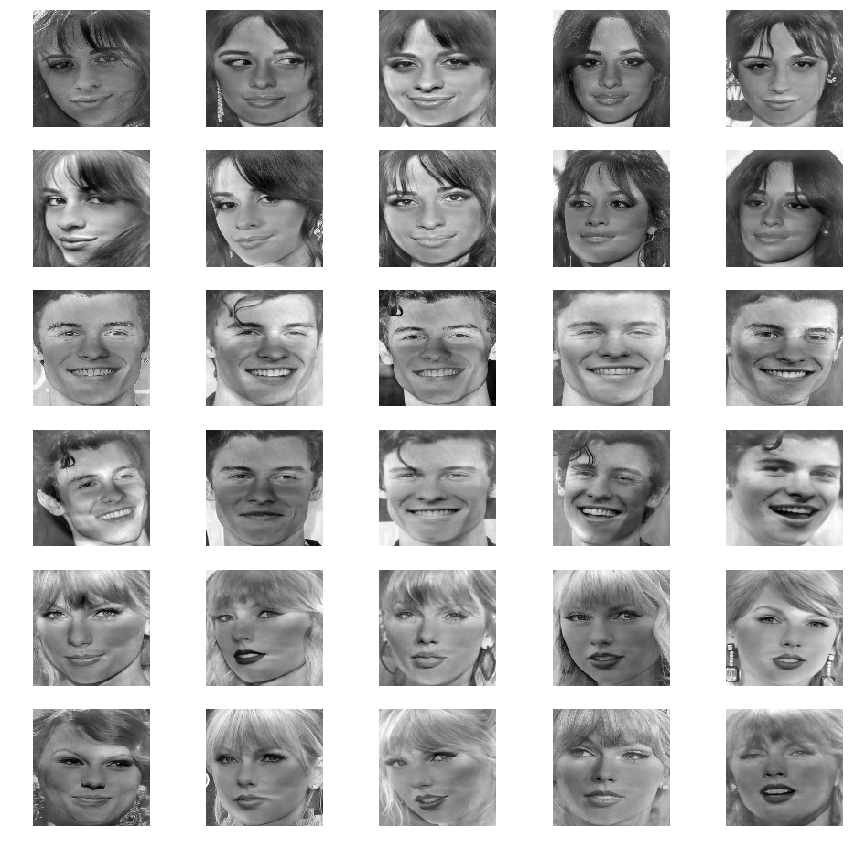

In [170]:
#Check this: https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/
# And this: https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184
# SVD: https://medium.com/machine-learning-world/linear-algebra-svd-and-pca-5979f739e95a
# eigenface: chrome-extension://cbnaodkpfinfiipjblikofhlhlcickei/src/pdfviewer/web/viewer.html?file=http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf
# http://laid.delanover.com/explanation-face-recognition-using-eigenfaces/

image_vector_list = [] 
image_sum = np.zeros(shape=(128,128)).ravel()
                    
for image in image_list: 
    # Obtain face images 
    # Represent image image as a vector 
    image_vector = image.reshape(128,128).ravel()
    image_sum += image_vector 
    image_vector_list.append(image_vector)

# Compute average face vector 
average_face = (image_sum/len(image_list)).ravel()
average_face_image = average_face.reshape(128,128)
plt.figure(figsize=(5,5))
plt.imshow(average_face_image, cmap='gray'), plt.axis('off'), plt.show()

# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)

# Display average faces 
plt.figure(figsize=(15,15))
for i in range (0, len(new_image_vector_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_image_vector_list[i].reshape(128, 128), cmap='gray')    


# Calculate Covariance C = AA^T (less computationaly expensive)
# Step 1) Concatenate vectors into a matrix 
image_matrix = new_image_vector_list[0]
for i in range(1, len(new_image_vector_list)): 
    b = new_image_vector_list[i]
    image_matrix = np.column_stack((image_matrix, b))    

print("Image Matrix has shape: ", image_matrix.shape)

# Step 2) Calculate Covariance 
cov_matrix = np.cov(image_matrix.T)
print("cov matrix ", cov_matrix.shape)

# Compute the eigenvector and eigenvalue 
eigenvalue, eigenvector = np.linalg.eig(cov_matrix) 

# Make eigen-pair 
eigen_pair = [(np.abs(eigenvalue[i]), eigenvector[i]) for i in range(len(eigenvalue))]
# for i in range(len(eigen_pair)):
#     print("old eigenvector", eigen_pair[i][1])

new_eigenvector = [] 
new_val = np.zeros(shape=(128,128)).ravel()
for i in range(len(eigen_pair)):
    # We previously calculate eigenvectors for A^T*A
    # Eigenvectors for A*A^T are Ui = A*Vi 
    new_val = np.dot(image_matrix, eigen_pair[i][1])
#     print("New val", new_val)
    new_eigenvector.append(new_val)

# print("new eigenvector ", new_eigenvector)

# Update eigen_pair 
new_eigen_pair = [(eigen_pair[i][0], new_eigenvector[i]) for i in range(len(eigen_pair))]

# Sort eigen-pair in descending form 
new_eigen_pair.sort(key=lambda x:x[0], reverse=True)
for i in range(len(new_eigen_pair)):
    print("eigenpair", new_eigen_pair[i][0], new_eigen_pair[i][1])

num_pair = len(new_eigen_pair)

# Variance captured by eah component 
tot = sum(eigenvalue)
var_exp = [(i/tot)*100 for i in sorted(eigenvalue, reverse=True)]
print("var exp ", var_exp)

# Total (Cumulative) sum 
cum_sum = np.cumsum(var_exp)
cum_sum_reverse = np.flipud(cum_sum)
print(cum_sum)

k = 17  # Eigenvector Number used for calculation 
# Create a matrix correspond to the eigenvectors 
chosen_eigen_pair = new_eigen_pair[0][1].reshape(128*128,1)
for i in range(1, k): 
    print(i)
    b = new_eigen_pair[i][1].reshape(128*128,1)
#     print("chosen ", chosen_eigen_pair)
    chosen_eigen_pair = np.hstack((chosen_eigen_pair, b))

new_matrix = chosen_eigen_pair
print(new_matrix.shape)
print("New matrix ", new_matrix)
 

#### 2 Plot the variance against the eigenvector number in descending order (i.e. total variance vs. number of principal components)

Cumulative sum:  [100.         100.          99.3303625   98.56524278  97.79128838
  96.94395579  96.03832147  95.10526836  94.02611536  92.88541836
  91.66438046  90.41005669  89.036251    87.41185461  85.76869778
  83.99948814  82.17407286  80.25079702  78.21297514  76.10664593
  73.71463852  71.1527388   68.26883854  65.35908062  61.74371746
  57.44751681  51.31616497  44.52836804  35.85884305  23.25264775]
Number of Eigenvector  30


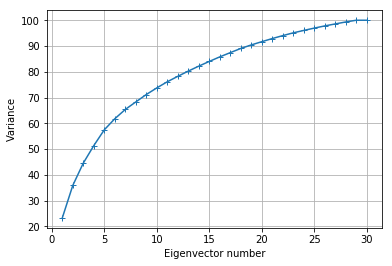

In [171]:
print("Cumulative sum: ", cum_sum_reverse)
print("Number of Eigenvector ", num_pair)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Variance")
x = (np.arange(num_pair, 0, -1))
plt.plot(x, cum_sum_reverse, marker='+')
plt.grid(True)
plt.show() 

#### 3  Plot the total variance against the eigenvector number used for computation

Total Variance in reverse order  [87.41185461 85.76869778 83.99948814 82.17407286 80.25079702 78.21297514
 76.10664593 73.71463852 71.1527388  68.26883854 65.35908062 61.74371746
 57.44751681 51.31616497 44.52836804 35.85884305 23.25264775]


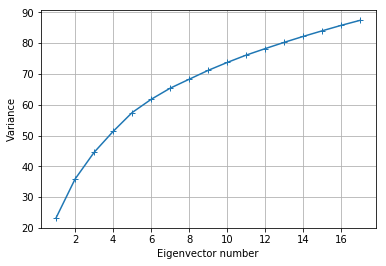

In [172]:
y = cum_sum[:k]
y = np.flipud(y)
print("Total Variance in reverse order ", y)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Variance")
x = (np.arange(k, 0, -1))
plt.plot(x, y, marker='+')
plt.grid(True)
plt.show() 
          

#### 4 Do you need all the vectors to represent the data? Discuss

In [173]:
# TODO 

#### 5 Display the first 5 eigenfaces

(16384, 17)


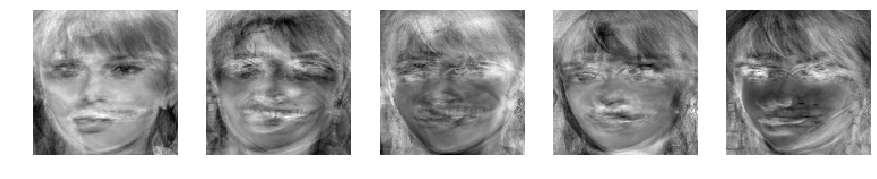

In [174]:
print(new_matrix.shape)

num_eigenface = 5

plt.figure(figsize=(15,15))
for i in range (0, num_eigenface): 
    plt.subplot(1, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_matrix[:,i].reshape(128,128), cmap='gray')    


## 3 Neighbourhood Clustering

#### 1 For every training image, find the nearest neighbour (L2 distance), and check whether both images belong to the same person. 

In [175]:
from sklearn.neighbors import KNeighborsClassifier 
    
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
# https://medium.com/beesightsoft/build-your-own-face-recognition-using-face-recognition-library-and-k-nearest-neighbors-classifier-611ffc973d4b

# Prepare Feature and Label 
feature = image_matrix 
label = []
label[:10] = ['Camila Cabello' for x in range(10)]
label[10:20] = ['Shane Mendes' for x in range(10, 20)]
label[20:30] = ['Taylor Swift' for x in range(20, 30)]

print("Label: ", label)
print(feature.T.shape)
# Apply KNN Neighbor 
near_neighbor = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
near_neighbor.fit(feature.T, label)

# Make Prediction 
predict = near_neighbor.predict(feature.T)
print("Prediction: ", predict)

Label:  ['Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift']
(30, 16384)
Prediction:  ['Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Shane Mendes' 'Shane Mendes'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Camila Cabello'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Shane Mendes'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'Camila Cabello' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift'

#### 2 What fraction of your data has a neighbour that is of the same person?

In [176]:
# Calculate Fraction of Correct Data 
count = 0
for i in range(len(predict)):
    if predict[i] == label[i]:
        count+=1

fraction = count/len(predict)
print("{} of the data are correct".format(fraction))

0.9333333333333333 of the data are correct


#### 3 Do this both in the original high dimensional pixel space and then in the eigenspace, and compare the accuracy values. 

In [196]:
# Prepare Feature and Label 
feature_eigen = new_matrix.T
label_eigen = label 
print(label_eigen)
print(feature_eigen.shape)
print(image_matrix.shape)

num = (feature_eigen.shape[0])
term = [] 

for i in range(len(image_matrix[1])): 
    reconstruct_value = 0
    for j in range(num):

        value = np.dot(image_matrix[:,i], feature_eigen[j,:])
        reconstruct_value += value*feature_eigen[j,:]
    term.append(reconstruct_value)

print(len(term))

eigenspace = term[0]
for i in range(1, len(term)): 
    b = term[i]
    eigenspace = np.column_stack((eigenspace, b)) 
print("eigenspace ", eigenspace.shape)


# Apply KNN Neighbor 
near_neighbor_eigen = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
near_neighbor_eigen.fit(eigenspace.T, label_eigen)

# Make Prediction 
predict_eigen = near_neighbor_eigen.predict(eigenspace.T)
print("Prediction: ", predict_eigen, "\n")

# Calculate Fraction of Correct Data 
count_eigen = 0
for i in range(len(predict_eigen)):
    if predict_eigen[i] == label_eigen[i]:
        count_eigen+=1

fraction_eigen = count_eigen/len(predict_eigen)
print("{} of the data are correct".format(fraction_eigen), "\n")

print(" ------------- Comparison ------------")
print("Accuracy in high dim pixel space: ", fraction)
print("Accuracy in eigenspace:           ", fraction_eigen)

['Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift']
(17, 16384)
(16384, 30)
30
eigenspace  (16384, 30)
Prediction:  ['Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Shane Mendes' 'Shane Mendes'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Camila Cabello'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Shane Mendes'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'Camila Cabello' 'Taylor Swift'

#### 4 Would you expect there to be a significant difference?

From the result above, there is only a very small distance between accurarcy in high dimensional pixel space and in eigenspace. Hence, I can conclude that the eigenfaces can accurately represent the training images. 

## 4 Face Detection & Recognition

#### 1 Display your image with bounding boxes around detected faces for your best threshold

(16384, 17)
(128, 128)
(16384,)
average weight vector  [-0.08952807 -0.31875246  0.37856405  0.19907534  0.31942368 -0.1008876
 -0.29426239 -0.4113984  -0.18455904 -0.12103195 -0.04832619 -0.09648556
  0.33691979 -0.10583141  0.22333808 -0.27152124 -0.17526121]
Count 10
10
450 390
480 390
480 420
480 450
690 540
840 540
660 570
660 600
660 630
660 660


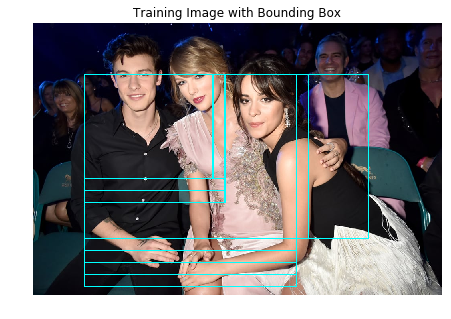

((-0.5, 1023.5, 681.5, -0.5), None)

In [237]:
test_image_gray = test_image 
test_image_gray = cv2.cvtColor(test_image_gray, cv2.COLOR_BGR2GRAY)
test_average_face = average_face 

test_new_matrix = new_matrix
print(test_new_matrix.shape)
print(image.shape)
print(test_average_face.shape)

# Calculate Weight Vector for Average face 
average_weight_vector = np.zeros(test_new_matrix.shape[1]).ravel() 
for i in range(test_new_matrix.shape[1]):
    average_weight_vector[i] = np.dot(test_average_face, test_new_matrix[:,i])
average_weight_vector = average_weight_vector/np.linalg.norm(average_weight_vector)
print("average weight vector ", average_weight_vector)
    
# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)


# Create a sliding window to extract small portion of image from the test image 
def slidingWindow(image, stepSize, windowSize, test_new_matrix, threshold, average_weight_vector):
    count = 0
    y_pos = []
    x_pos = []
    h = image.shape[0]
    w = image.shape[1]
    y1 = windowSize[0]
    x1 = windowSize[1]
    
    reconstruction_term = [] 
    # define window size and step size 
    for y in range (0, h, stepSize): 
        for x in range (0, w, stepSize):
    
            # Extract image
            window_image = image[y:y + y1, x: x + x1]
            window_image = cv2.resize(window_image, (y1, x1)).ravel()
            window_image = np.subtract(window_image, test_average_face).ravel() 
            
            # Reconstruction 
            reconstruction_weight_vector = np.zeros(test_new_matrix.shape[1]).ravel() 
            for i in range(test_new_matrix.shape[1]):
                reconstruction_weight_vector[i] = np.dot(window_image, test_new_matrix[:,i])
            reconstruction_weight_vector = reconstruction_weight_vector/np.linalg.norm(reconstruction_weight_vector)
            distance = cv2.norm(reconstruction_weight_vector-average_weight_vector, cv2.NORM_L2)
            
            if distance*100 < threshold: 
                count += 1
                y_pos.append(y)
                x_pos.append(x)
                
#                 reconstruction_value += value*new_matrix[:,i]
#                 reconstruction_term.append(reconstruction_value)

#             print("reconstruct ", reconstruction_value)
    position_pair = [(y_pos[i], x_pos[i]) for i in range(len(y_pos))]
    return count, position_pair 
#             yield (y, x, image)
            
stepSize = 30
windowSize = [128, 128]
threshold = 20
# Extract window from test image 
count, position_pair = slidingWindow(test_image_gray, stepSize, windowSize, test_new_matrix, threshold, average_weight_vector)            

print("Count", count)
print(len(position_pair))

# Display test image with bounding boxes
bounding_box_image = test_image.copy()
plt.figure(figsize=(15,5))
for i in range(len(position_pair)): 
    x_pos = position_pair[i][1]
    y_pos = position_pair[i][0]
    print(x_pos, y_pos)
    cv2.rectangle(bounding_box_image, (x_pos, y_pos), (windowSize[1], windowSize[0]), (0, 255, 255), 2)

plt.imshow(bounding_box_image), plt.title("Training Image with Bounding Box")
plt.axis('off'),plt.show()
    

# Display average faces 
# plt.figure(figsize=(15,15))
# for i in range (1, len(reconstruction_term)): 
#     plt.subplot(6, 5, i) 
#     plt.axis('off')
#     plt.imshow(reconstruction_term[i].reshape(128, 128), cmap='gray')    
# TODO: compare the eigenspace face with the mean face 
# OR: comapre W with weight vectors Wm of images in the database, find euclidean distance 
#  ref: wiki

#### 2 For the windows in which a face is correctly detected, project the contents of the window to your eigenspace and find the nearest neighbour from your data. The identity of the detected face will be based on the identity of the closest person in the training set

#### 3 How well does the method work? How many false positive face detections do you get?

#### 4 For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1)

#### 5 In which situations would expect the approach to fail, and what could you do to improve it?

In [ ]:

# print("Image matrix shape", image_matrix.shape)
# print("new matrix shape", new_matrix.shape)
# eigenface = image_matrix.T.dot(new_matrix)

# print(eigenface.shape)


# From Eigenface Wiki 
# https://en.wikipedia.org/wiki/Eigenface
# 1) Each image is treated as one vector (r*c)

# 2) Store all images of training set in a single matrix T,
#    where each column of the matrix is an image 

# 3) Subtract the mean. The average image a has to be calculated and
#    then subtracted from each original image in T
    
# 4) Calculate the eigenvectors and eigenvalues of the covariance
#    matrix S

# 5)Choose the principal components 

# 6) K is the smallest number that satisfies ... 


# https://www.youtube.com/watch?v=uFbDWu0tDrE
# Also check this: https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/# Standardize the data 

# Standardize the data 
# -> x_std

# To find out covariance, use: 
# np.cov()

# To find out eigenvalue, vector, use: 
# eig_vals, eig_vecs = np.linalg.eig(a covaraince matrix) 


# To sort eigenvalue and eigenvector 

    # Make a list of (eigvalue, eigvector) tuple
    # eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    
    # Sort the (eigvalue, eigvector) tuples from high to low 
#      eig_pairs.sort(key=lambda x:x[0], reverse=True)
    
# Variance captured by eah component 
# tot = sum(eig_vals)
# var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]

# Cumulative variance captured as we travel each component 
#cum_var_exp = np.cumsum(var_exp)

# Depend on the cumulative variance, we can see k components contribute to the data most 

# Create a matrix W that corresond to the eigenvectors of the top most eigenvalues 
# matrix_w = np.hstack((eig_pairs[x][x].reshape(4,1),
#                       eig_pairs[x][x].reshape(4,1)))

# Whatever data I have, I projected onto those eigenvectors 
# y = x_std.dot(matrix_w)